# CVModel評価

In [29]:
from sklearn import datasets,metrics
from sklearn.model_selection import KFold,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# データの読み込み
digits=datasets.load_digits()

feature=digits.data
target=digits.target

# 変換
standardzer=StandardScaler()

# 予測
logit=LogisticRegression()

# 結合
pipline=make_pipeline(standardzer,logit)


# 分割
kf=KFold(n_splits=10,shuffle=True,random_state=1)

# 評価
cv_result=cross_val_score(
    pipline,
    feature,
    target,
    cv=kf, # 分け方を指定
    scoring='accuracy',# precision,recallなど、べつの評価も可能
    n_jobs=1 # -1ですべてのcpuを使用
    )

In [30]:
#　評価値の確認
cv_result.mean()

0.964931719428926

# 二値分類の評価と可視化

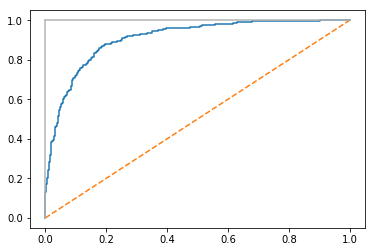

In [65]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

# データの分割
feature,target=make_classification(
    n_samples=10000,
    n_features=10,
    n_classes=2,
    n_informative=3,
    random_state=3)

feature_train,feature_test,target_train,target_test=train_test_split(feature,target,test_size=0.1,random_state=1)

logit=LogisticRegression()

logit.fit(feature_train,target_train)

# LogRegreessionでの予測値
target_prob=logit.predict_proba(feature_test)[:,1]

# rocカーブのデータ
# thの値以上のscoreをpositiveと判定する(閾値)
f_p_rate,t_p_rate,th=roc_curve(target_test,target_prob)


fig=plt.figure()
ax=fig.subplots()

ax.plot(f_p_rate,t_p_rate)
ax.plot([0,1],ls='--')
ax.plot([0,0],[1,0],c='.7')
ax.plot([1,1],c='.7')

In [67]:
# AUCの値
roc_auc_score(target_test,target_prob)

0.9073389355742296

# 複数クラスの分類評価

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

features,target=make_classification(
n_samples=100000,
n_features=3,
n_informative=3,
n_redundant=0,
n_classes=3,
random_state=1)

# 多分類でも普通にlogitでいける
logit=LogisticRegression()

# CV
cross_val_score(logit,features,target,scoring='accuracy')

array([0.7201056 , 0.71523715, 0.71745717])

# クラス分類器のパフォーマンスの可視化

Text(33,0.5,'True Class')

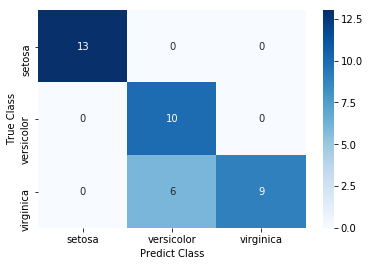

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn import datasets

iris=datasets.load_iris()


features=iris.data
target=iris.target


class_names=iris.target_names

f_tran,f_test,t_train,t_test=train_test_split(features,target,random_state=1)

logit=LogisticRegression()

target_predit=logit.fit(f_tran,t_train).predict(f_test)

# 混合行列を作成
matrix=confusion_matrix(target_predit,t_test)

# dfに変換
matrix_df=pd.DataFrame(matrix,index=class_names,columns=class_names)

# heatmapで混合行列を可視化
# annotで値を表示
ax=sns.heatmap(matrix_df,annot=True,cbar=True,cmap='Blues')
ax.set_xlabel('Predict Class')
ax.set_ylabel('True Class')

- 対角部分の色が濃いほど、良い判定ができている
- どれとどれが間違われやすいかが一目瞭然である
- 混合行列は多分類でも定義できる

# 回帰モデルのパフォーマンスを評価しいたい

In [37]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 50,
                                   coef = False,
                                   random_state = 1)

ols=LinearRegression()

# MSEで評価
# scoreingを独自設定にしたければ、make_scorerを使う
# 分割方法を独自設定したければ、cvを設定する
cross_val_score(ols,features,target,scoring='neg_mean_squared_error')

array([-1718.22817783, -3103.4124284 , -1377.17858823])

# トレーニングセットのサイズの評価における寄与を可視化したい

In [42]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

disit=load_digits()

features,target=disit.data,disit.target

train_sizes,train_scores,test_scores=learning_curve(
RandomForestClassifier(),
features,
target,
cv=10,
scoring='accuracy',
train_sizes=np.linspace(0.01,1.0,50) # 50等分割ずつtrain量を増やしてく
)

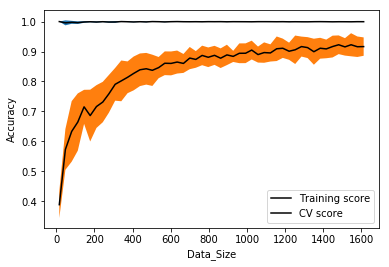

In [65]:
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)


plt.plot(train_sizes,train_mean,'k-',label='Training score')
plt.plot(train_sizes,test_mean,'k-',label='CV score')

# 標準偏差の範囲を色付け
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std)
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std)

plt.xlabel('Data_Size')
plt.ylabel('Accuracy')
plt.legend()